In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
import pandas as pd
import random

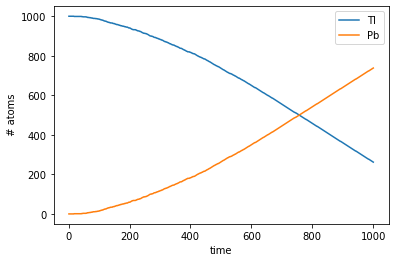

Text(0.5, 0, 'time ')

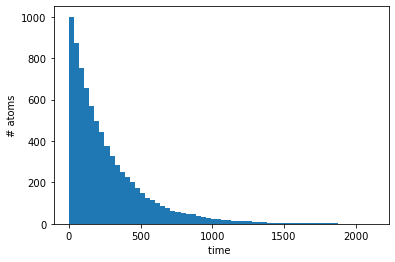

In [3]:
# QUESTION 1
T = 3.052*60 # minutes to seconds

tha = []
le = []
Tha = 1000
Le = 0


def func_p(t):
    return 1-2**(-(t)/(T))  # function for probability distribution

time = [i for i in range(1,1001)] #1 second and at each time-step decide , we have 1000 atoms for Tl

for i in time:
    if (np.random.uniform(0,1) < func_p(i)): # applying non-uniform probability distribution
        Tha -= 1  #decayed at each step from the Tl sample and add them to the Lead one
        Le += 1
    tha.append(Tha)
    le.append(Le)
    
plt.plot(time,tha,label="Tl")
plt.plot(time,le,label ='Pb')
plt.xlabel("time")
plt.ylabel(" # atoms")
plt.legend()
plt.show()

def func_p_2(p):
    return -np.log(1-p)/(np.log(2)/(T))  # using inverse transform
Tl_dist = func_p_2(np.random.uniform(0,1,1000)) # distribution for the atoms

plt.hist(Tl_dist,bins=60,cumulative=-1) # making cumulative -1 for showing the number of atoms that have not decayed as a function of time
plt.ylabel("# atoms")
plt.xlabel("time ")


Integral: 1.3428
Error :  0.006336309722654346
Integral : 1.3612457974755934
Error is  : 0.006515466131592568


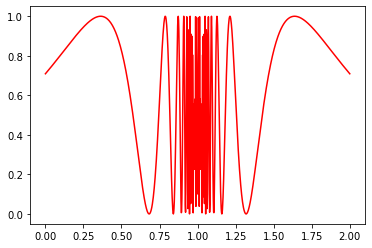

In [4]:
# QUESTION 2
import math

N = 10000
count = 0
def f(x):
    return (np.sin(1/((1-x))))**2

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')

for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): count += 1
    I = 2 * count / N
    err =0.6745*math.sqrt(I*((2)*1-I)/N) # variance over number of samples in saquare root
    
print("Integral:",I)
print("Error : ",err)

func_sum = []
for i in range(N):
   x =  2 * np.random.random()
   func_sum.append(f(x))
   I_2 = (2)*np.sum(func_sum)/N
   error_2 = 2*np.std(func_sum)/math.sqrt(N)


print("Integral :", I_2)
print("Error is  :", error_2)

In [5]:
# QUESTION 3
N = 1000000

def f(x,y):
    return x**2 + y**2

# Generate points in a square with side length 2
points = [(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)]

# Count the number of points inside the unit circle
area = 0
for x, y in points:
    if f(x,y) <= 1:
        area += 1

# Compute the area of the unit circle
area = area / N * 4 
print(area)

# Generate points in a 10-dimensional hypercube with side length 2
points_10D = [tuple(random.uniform(-1, 1) for i in range(10)) for j in range(N)]

# Count the number of points inside the unit sphere
sphere_volume = 0
for x in points_10D:
    if sum(x_i**2 for x_i in x) <= 1:
        sphere_volume += 1
# Compute the volume of the unit sphere
volume = sphere_volume / N * (2**10)
print(volume)

3.141516
2.640896


In [6]:
# QUESTION 4
import random
import math

# Number of samples to generate
n = 10000000

# Integrand function
def f(x):
    return x**(-0.5) / (math.exp(x) + 1)

# Importance function
def w(x):
    return 1 / math.sqrt(x)

# Generate samples from the importance function
samples = np.random.uniform(0,1,n)

# Compute the importance sampling estimate
estimate = sum(f(x) / w(x) for x in samples) / n

# Multiply by the normalizing constant of the importance function
estimate *= 2
print(estimate)

0.7598289175186096
